In [462]:
from collections import Counter # Keep track of our term counts
import pandas as pd # For converting results to a dataframe and bar chart plots
import json # For parsing json
from datetime import datetime as dt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import string
import random
import numpy as np

In [463]:
%pwd

'C:\\Users\\ernes\\Desktop\\WeCloudData\\W3\\webscrape projects'

- reviews by brand - which are the most highly rated products? ----------
- num reviews advertised on site - either pulled directly from brand website or is a review on the mec website ----------
- reviews:num reviews ratio ? Did not do ----------
- what is the distribution of products sold at mec? ----------
- which brands go on sale more frequently? Is it bc of poor performance? ----------
- avg price by brand and by sex ----------

In [464]:
mensproducts = pd.read_csv('men_mec_info_2020-10-17.csv') #contains clothing and footwear
mensproducts = mensproducts.rename(columns={'Unnamed: 0': 'Product_name'})

In [465]:
mensproducts.info() #need to change each column to appropriate datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product_name       793 non-null    object
 1   Brand              795 non-null    object
 2   Current_price      795 non-null    object
 3   Discount           795 non-null    object
 4   Avg_review_outof5  795 non-null    object
 5   Num_reviews        795 non-null    object
 6   Product_category   795 non-null    object
 7   Date_retrieved     795 non-null    object
dtypes: object(8)
memory usage: 49.8+ KB


In [466]:
# was not converting to float using .astype or just .to_numeric
# had to coerce suggesting there may be an something wrong in my data
# I believe it might be because the products were appended so the heading is shown twice in the df

a = pd.to_numeric(mensproducts['Current_price'], errors='coerce')
b = pd.to_numeric(mensproducts['Discount'], errors='coerce')
c = pd.to_numeric(mensproducts['Avg_review_outof5'], errors='coerce')
d = pd.to_numeric(mensproducts['Num_reviews'], errors='coerce')
e = pd.to_datetime(mensproducts['Date_retrieved'], errors='coerce')

mensproducts['Current_price'] = a
mensproducts['Discount'] = b
mensproducts['Avg_review_outof5'] = c
mensproducts['Num_reviews'] = d
mensproducts['Date_retrieved'] = e

In [467]:
mensproducts.info() #note: datetime64[ns] means non-specific

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product_name       793 non-null    object        
 1   Brand              795 non-null    object        
 2   Current_price      793 non-null    float64       
 3   Discount           793 non-null    float64       
 4   Avg_review_outof5  793 non-null    float64       
 5   Num_reviews        793 non-null    float64       
 6   Product_category   795 non-null    object        
 7   Date_retrieved     793 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 49.8+ KB


In [468]:
df = mensproducts

In [469]:
df

,Product_name,Brand,Current_price,Discount,Avg_review_outof5,Num_reviews,Product_category,Date_retrieved
0,NaN,Brand,NaN,NaN,NaN,NaN,Product_category,NaT
1,Baro Drywear The Brockton Rain Jacket - Men's,Baro Drywear,327.95,0.0,3.7,3.0,clothing,2020-10-17
2,Fjallraven Greenland No. 1 Down Jacket - Men's,Fjallraven,599.95,0.0,5.0,3.0,clothing,2020-10-17
3,MEC Cliffton Cargo Pants - Men's,MEC,74.95,0.0,5.0,1.0,clothing,2020-10-17
4,Patagonia Lightweight Synchilla Snap-Tee Pullo...,Patagonia,149.00,0.0,5.0,3.0,clothing,2020-10-17
...,...,...,...,...,...,...,...,...
790,Kodiak Dundonald Arctic Grip SaltShield Waterp...,Kodiak,209.95,0.0,2.0,1.0,footwear,2020-10-17
791,Nike React Infinity Run Flyknit Road Running S...,Nike,214.95,0.0,2.0,1.0,footwear,2020-10-17
792,Salomon X Raise Light Trail Shoes - Men's,Salomon,139.95,0.0,3.2,4.0,footwear,2020-10-17
793,Adidas Solar Glide Road Running Shoes - Men's,Adidas,179.95,0.0,1.0,1.0,footwear,2020-10-17


In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product_name       793 non-null    object        
 1   Brand              795 non-null    object        
 2   Current_price      793 non-null    float64       
 3   Discount           793 non-null    float64       
 4   Avg_review_outof5  793 non-null    float64       
 5   Num_reviews        793 non-null    float64       
 6   Product_category   795 non-null    object        
 7   Date_retrieved     793 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 49.8+ KB


In [471]:
df.index

RangeIndex(start=0, stop=795, step=1)

In [472]:
list(df[df['Product_name'].isnull()].index)

[0, 459]

In [473]:
for num in list(df[df['Product_name'].isnull()].index):
    df = df.drop(index = num + 1)  # remove null rows that is not the header

In [474]:
df['Product_category'].unique()

array(['Product_category', 'clothing', 'footwear'], dtype=object)

In [475]:
df['Brand'].nunique()

91

In [476]:
df.groupby('Product_category').agg('count') #how to do a stacked bar chart comparing men and women

,Product_name,Brand,Current_price,Discount,Avg_review_outof5,Num_reviews,Date_retrieved
Product_category,,,,,,,
Product_category,0,2,0,0,0,0,0
clothing,457,457,457,457,457,457,457
footwear,334,334,334,334,334,334,334


In [477]:
df[['Brand', 'Product_name']].groupby('Brand').agg('count').sort_values('Product_name',ascending=False)

,Product_name
Brand,
MEC,96
Patagonia,73
The North Face,44
Arc'teryx,41
Salomon,33
...,...
Kamik,1
Karpos,1
Lenz,1


In [478]:
df[['Brand', 'Product_name']].groupby('Brand').agg('count').sort_values('Product_name',ascending=False)['Product_name'].nlargest(15)

Brand
MEC               96
Patagonia         73
The North Face    44
Arc'teryx         41
Salomon           33
Fjallraven        29
Prana             25
Keen              20
Merrell           20
Brooks            19
New Balance       18
La Sportiva       17
Smartwool         16
Timberland        15
Scarpa            15
Name: Product_name, dtype: int64

In [479]:
#sort by count in desc order

menpdar = df[df['Product_category'] == 'clothing'].groupby('Brand').agg({'Current_price': ['count', 'mean', 'min', 'max'],
                         'Discount': ['mean', 'min', 'max'],
                         'Avg_review_outof5': ['mean', 'min', 'max'],
                         'Num_reviews': ['mean', 'min', 'max']}).sort_values(('Current_price', 'count'), ascending=False)

menpdar = menpdar.reset_index()

menpdar

Brand Current_price                               Discount  \
                             count        mean     min     max       mean   
0                MEC            95   97.324632   17.95  399.95  12.578947   
1          Patagonia            73  169.336986   31.50  749.00   6.986301   
2     The North Face            37  208.891892   27.97  779.99  14.297297   
3          Arc'teryx            30  260.183000   44.95  599.95   7.433333   
4         Fjallraven            29  228.328276   49.95  649.95   3.448276   
5              Prana            25   63.246000   39.00   87.97  25.240000   
6          Smartwool            15   98.658000   26.95  189.95   2.400000   
7              Vuori            14  100.667857   53.95  139.95   0.000000   
8            Picture             9  227.752222  109.93  499.95  13.000000   
9      Black Diamond             9   95.057778   24.94  199.95  20.000000   
10           Houdini             8  114.557500   36.94  199.93  47.750000   
11           Tentree             8   65.950000   35.95   88.95   0.000000   
12               Rab             7  224.235714  129.95  379.95   0.000000   
13             DU/ER             7  122.661429   69.93  147.95   7.571429   
14      Showers Pass             7  266.378571  149.95  394.95   0.000000   
15             Kombi             7   49.521429   19.95   94.95   0.000000   
16              Kuhl             6   87.685000   47.93  104.95  15.666667   
17            Brooks             6   51.450000   33.95   74.95   0.000000   
18           Auclair             4   27.450000   19.95   34.95   0.000000   
19            Stance             4   26.835000   19.94   35.95   7.750000   
20             BN3TH             4   44.450000   34.95   64.95   0.000000   
21         Level Six             4   73.700000   41.93   99.95  15.000000   
22             Levis             4  103.962500   89.95  118.00   0.000000   
23               TYR             3   39.283333   32.95   44.95   0.000000   
24              Saxx             3   48.283333   34.95   69.95   0.000000   
25          Sportful             3   63.276667   29.95   89.93  16.666667   
26               NRS             3  126.283333   92.95  152.95   0.000000   
27              Xcel             3   40.606667   37.94   41.94  30.333333   
28          Cotopaxi             3  103.276667   79.95  129.95  16.666667   
29       Pearl Izumi             2  119.950000   99.95  139.95   0.000000   
30              Odlo             2   33.930000   31.93   35.93  54.500000   
31            Pistil             2   37.450000   34.95   39.95   0.000000   
32      Baro Drywear             2  285.950000  223.95  347.95   0.000000   
33             Swany             2  119.950000  119.95  119.95   0.000000   
34             Chaos             2   27.940000   20.93   34.95  23.000000   
35            Wigwam             1   48.950000   48.95   48.95   0.000000   
36         B Daehlie             1  119.950000  119.95  119.95   0.000000   
37            United             1   37.930000   37.93   37.93  56.000000   
38         Billabong             1   41.930000   41.93   41.93  40.000000   
39          Castelli             1   49.950000   49.95   49.95   0.000000   
40            Speedo             1   49.950000   49.95   49.95   0.000000   
41            Phelps             1  299.950000  299.95  299.95   0.000000   
42          Ear Podz             1   19.000000   19.00   19.00   0.000000   
43            Karpos             1   79.940000   79.94   79.94  50.000000   
44              Lenz             1  289.950000  289.95  289.95   0.000000   
45           Salomon             1  119.950000  119.95  119.95   0.000000   
46         Race Face             1  189.950000  189.95  189.95   0.000000   
47            Mammut             1  153.270000  153.27  153.27  30.000000   
48  Mustang Survival             1  379.990000  379.99  379.99   0.000000   
49            Adidas             1   38.380000   38.38   38.38  52.000000   

          

In [480]:
menpdar['Discount_percent'] = 1 - (menpdar_test[('Discount','mean')] / 100)

menpdar['MSRP'] = menpdar[('Current_price','mean')] / menpdar[('Discount_percent')]

menpdar

Brand Current_price                               Discount  \
                             count        mean     min     max       mean   
0                MEC            95   97.324632   17.95  399.95  12.578947   
1          Patagonia            73  169.336986   31.50  749.00   6.986301   
2     The North Face            37  208.891892   27.97  779.99  14.297297   
3          Arc'teryx            30  260.183000   44.95  599.95   7.433333   
4         Fjallraven            29  228.328276   49.95  649.95   3.448276   
5              Prana            25   63.246000   39.00   87.97  25.240000   
6          Smartwool            15   98.658000   26.95  189.95   2.400000   
7              Vuori            14  100.667857   53.95  139.95   0.000000   
8            Picture             9  227.752222  109.93  499.95  13.000000   
9      Black Diamond             9   95.057778   24.94  199.95  20.000000   
10           Houdini             8  114.557500   36.94  199.93  47.750000   
11           Tentree             8   65.950000   35.95   88.95   0.000000   
12               Rab             7  224.235714  129.95  379.95   0.000000   
13             DU/ER             7  122.661429   69.93  147.95   7.571429   
14      Showers Pass             7  266.378571  149.95  394.95   0.000000   
15             Kombi             7   49.521429   19.95   94.95   0.000000   
16              Kuhl             6   87.685000   47.93  104.95  15.666667   
17            Brooks             6   51.450000   33.95   74.95   0.000000   
18           Auclair             4   27.450000   19.95   34.95   0.000000   
19            Stance             4   26.835000   19.94   35.95   7.750000   
20             BN3TH             4   44.450000   34.95   64.95   0.000000   
21         Level Six             4   73.700000   41.93   99.95  15.000000   
22             Levis             4  103.962500   89.95  118.00   0.000000   
23               TYR             3   39.283333   32.95   44.95   0.000000   
24              Saxx             3   48.283333   34.95   69.95   0.000000   
25          Sportful             3   63.276667   29.95   89.93  16.666667   
26               NRS             3  126.283333   92.95  152.95   0.000000   
27              Xcel             3   40.606667   37.94   41.94  30.333333   
28          Cotopaxi             3  103.276667   79.95  129.95  16.666667   
29       Pearl Izumi             2  119.950000   99.95  139.95   0.000000   
30              Odlo             2   33.930000   31.93   35.93  54.500000   
31            Pistil             2   37.450000   34.95   39.95   0.000000   
32      Baro Drywear             2  285.950000  223.95  347.95   0.000000   
33             Swany             2  119.950000  119.95  119.95   0.000000   
34             Chaos             2   27.940000   20.93   34.95  23.000000   
35            Wigwam             1   48.950000   48.95   48.95   0.000000   
36         B Daehlie             1  119.950000  119.95  119.95   0.000000   
37            United             1   37.930000   37.93   37.93  56.000000   
38         Billabong             1   41.930000   41.93   41.93  40.000000   
39          Castelli             1   49.950000   49.95   49.95   0.000000   
40            Speedo             1   49.950000   49.95   49.95   0.000000   
41            Phelps             1  299.950000  299.95  299.95   0.000000   
42          Ear Podz             1   19.000000   19.00   19.00   0.000000   
43            Karpos             1   79.940000   79.94   79.94  50.000000   
44              Lenz             1  289.950000  289.95  289.95   0.000000   
45           Salomon             1  119.950000  119.95  119.95   0.000000   
46         Race Face             1  189.950000  189.95  189.95   0.000000   
47            Mammut             1  153.270000  153.27  153.27  30.000000   
48  Mustang Survival             1  379.990000  379.99  379.99   0.000000   
49            Adidas             1   38.380000   38.38   38.38  52.000000   

          

In [481]:
menpdar.iloc[:15]

Brand Current_price                               Discount        \
                           count        mean     min     max       mean   min   
0              MEC            95   97.324632   17.95  399.95  12.578947   0.0   
1        Patagonia            73  169.336986   31.50  749.00   6.986301   0.0   
2   The North Face            37  208.891892   27.97  779.99  14.297297   0.0   
3        Arc'teryx            30  260.183000   44.95  599.95   7.433333   0.0   
4       Fjallraven            29  228.328276   49.95  649.95   3.448276   0.0   
5            Prana            25   63.246000   39.00   87.97  25.240000   0.0   
6        Smartwool            15   98.658000   26.95  189.95   2.400000   0.0   
7            Vuori            14  100.667857   53.95  139.95   0.000000   0.0   
8          Picture             9  227.752222  109.93  499.95  13.000000   0.0   
9    Black Diamond             9   95.057778   24.94  199.95  20.000000   0.0   
10         Houdini             8  114.557500   36.94  199.93  47.750000  36.0   
11         Tentree             8   65.950000   35.95   88.95   0.000000   0.0   
12             Rab             7  224.235714  129.95  379.95   0.000000   0.0   
13           DU/ER             7  122.661429   69.93  147.95   7.571429   0.0   
14    Showers Pass             7  266.378571  149.95  394.95   0.000000   0.0   

         Avg_review_outof5           Num_reviews             Discount_percent  \
     max              mean  min  max        mean  min    max                    
0   68.0          3.635789  0.0  5.0    7.600000  0.0   56.0         0.874211   
1   30.0          2.706849  0.0  5.0    2.164384  0.0   17.0         0.930137   
2   56.0          1.486486  0.0  5.0    0.729730  0.0    7.0         0.857027   
3   50.0          4.270000  0.0  5.0   50.266667  0.0  396.0         0.925667   
4   40.0          2.806897  0.0  5.0    1.172414  0.0    5.0         0.965517   
5   50.0          2.800000  0.0  5.0    1.800000  0.0    8.0         0.747600   
6   36.0          1.280000  0.0  5.0    4.533333  0.0   38.0         0.976000   
7    0.0          1.428571  0.0  5.0    0.285714  0.0    1.0         1.000000   
8   45.0          0.444444  0.0  4.0    0.111111  0.0    1.0         0.870000   
9   52.0          3.144444  0.0  4.8   10.888889  0.0   27.0         0.800000   
10  54.0          0.625000  0.0  5.0    0.125000  0.0    1.0         0.522500   
11   0.0          0.875000  0.0  4.0    0.375000  0.0    2.0         1.000000   
12   0.0          0.714286  0.0  5.0    0.142857  0.0    1.0         1.000000   
13  53.0          3.428571  0.0  5.0    4.285714  0.0   10.0         0.924286   
14   0.0          4.185714  2.5  4.7   41.000000  2.0  111.0         1.000000   

          MSRP  
                
0   111.328597  
1   182.055965  
2   243.740145  
3   281.076341  
4   236.482857  
5    84.598716  
6   101.084016  
7   100.667857  
8   261.784163  
9   118.822222  
10  219.248804  
11   65.950000  
12  224.235714  
13  132.709428  
14  266.378571

In [482]:
menpdar['Brand'][menpdar[('Current_price','count')] >= 5]

0                MEC
1          Patagonia
2     The North Face
3          Arc'teryx
4         Fjallraven
5              Prana
6          Smartwool
7              Vuori
8            Picture
9      Black Diamond
10           Houdini
11           Tentree
12               Rab
13             DU/ER
14      Showers Pass
15             Kombi
16              Kuhl
17            Brooks
Name: Brand, dtype: object

In [483]:
#greater than 5 producs listed

brand_list = []

for i in menpdar['Brand'][menpdar[('Current_price','count')] >= 5]:
    print(i)
    brand_list.append(i)  
    
print(brand_list)
print(len(brand_list))
print(brand_list[:15])
print(len(brand_list[:15]))

MEC
Patagonia
The North Face
Arc'teryx
Fjallraven
Prana
Smartwool
Vuori
Picture
Black Diamond
Houdini
Tentree
Rab
DU/ER
Showers Pass
Kombi
Kuhl
Brooks
['MEC', 'Patagonia', 'The North Face', "Arc'teryx", 'Fjallraven', 'Prana', 'Smartwool', 'Vuori', 'Picture', 'Black Diamond', 'Houdini', 'Tentree', 'Rab', 'DU/ER', 'Showers Pass', 'Kombi', 'Kuhl', 'Brooks']
18
['MEC', 'Patagonia', 'The North Face', "Arc'teryx", 'Fjallraven', 'Prana', 'Smartwool', 'Vuori', 'Picture', 'Black Diamond', 'Houdini', 'Tentree', 'Rab', 'DU/ER', 'Showers Pass']
15


In [484]:
brand_list.sort()

In [485]:
brand_list

["Arc'teryx",
 'Black Diamond',
 'Brooks',
 'DU/ER',
 'Fjallraven',
 'Houdini',
 'Kombi',
 'Kuhl',
 'MEC',
 'Patagonia',
 'Picture',
 'Prana',
 'Rab',
 'Showers Pass',
 'Smartwool',
 'Tentree',
 'The North Face',
 'Vuori']

In [486]:
def get_mec_info(df, brand, column_name):
    return df[df['Brand'] == brand][column_name]

In [487]:
my_list = []

testy = get_mec_info(menpdar, 'MEC', ('Discount', 'mean'))
print(testy)
print(testy[0])
my_list.append(testy[0])
print(my_list)

0    12.578947
Name: (Discount, mean), dtype: float64
12.578947368421053
[12.578947368421053]


In [488]:
testx = get_mec_info(menpdar, 'MEC', ('Current_price', 'mean'))
print(testx)

0    97.324632
Name: (Current_price, mean), dtype: float64


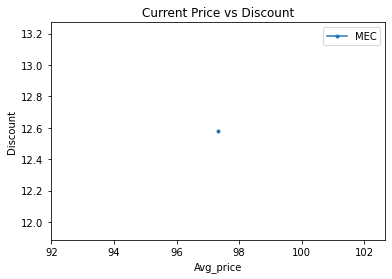

In [489]:
plt.plot(testx, testy, marker = '.', label = 'MEC')

plt.xlabel('Avg_price')
plt.ylabel('Discount')
plt.title('Current Price vs Discount')
plt.legend()

In [490]:
menpdar[menpdar['Brand'] == 'MEC'][('Discount', 'mean')]

0    12.578947
Name: (Discount, mean), dtype: float64

In [491]:
marker_list = ['.','o','v','^','<','>','x','X','+','*','1','2','3','4','8','H','h','p','P','d','D','s','|','_']
len(marker_list)

24

In [492]:
marker_list_discount = marker_list[:(len(brand_list))]

In [493]:
discount_value

[3    7.433333
 Name: (Discount, mean), dtype: float64,
 9    20.0
 Name: (Discount, mean), dtype: float64,
 17    0.0
 Name: (Discount, mean), dtype: float64,
 13    7.571429
 Name: (Discount, mean), dtype: float64,
 4    3.448276
 Name: (Discount, mean), dtype: float64,
 10    47.75
 Name: (Discount, mean), dtype: float64,
 15    0.0
 Name: (Discount, mean), dtype: float64,
 16    15.666667
 Name: (Discount, mean), dtype: float64,
 0    12.578947
 Name: (Discount, mean), dtype: float64,
 1    6.986301
 Name: (Discount, mean), dtype: float64,
 8    13.0
 Name: (Discount, mean), dtype: float64,
 5    25.24
 Name: (Discount, mean), dtype: float64,
 12    0.0
 Name: (Discount, mean), dtype: float64,
 14    0.0
 Name: (Discount, mean), dtype: float64,
 6    2.4
 Name: (Discount, mean), dtype: float64,
 11    0.0
 Name: (Discount, mean), dtype: float64,
 2    14.297297
 Name: (Discount, mean), dtype: float64,
 7    0.0
 Name: (Discount, mean), dtype: float64]

In [494]:
#discount_val = []
#count = 0
#for i in discount_value:
#    discount_val.append(i[count])
#    count += 1
    
#discount_val.sort()
#print(type(discount_val.sort()))

def custom_round(x, base=5):
    return int(base * round(float(x)/base))

#sorted_vals = [custom_round(x, base=5) for x in discount_val]


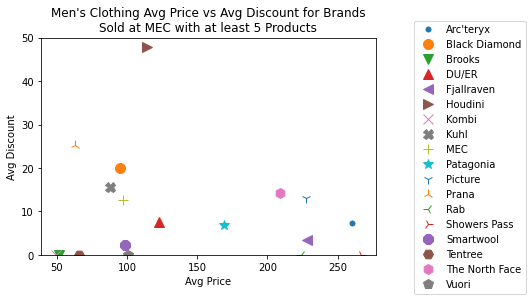

In [495]:
discount_value = []

for brand,marker in zip(brand_list, marker_list_discount):
    price = get_mec_info(menpdar, brand, ('Current_price','mean'))
    discount = get_mec_info(menpdar, brand, ('Discount', 'mean'))
    discount_value.append(discount)
    plt.plot(price, discount, marker, markersize = 10, label = brand)

plt.xlabel('Avg Price')
plt.ylabel('Avg Discount')
plt.ylim(0, 50)
plt.title("Men's Clothing Avg Price vs Avg Discount for Brands\nSold at MEC with at least 5 Products")
plt.legend(loc = 'right')

ax = plt.gca()
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes);

In [496]:
discount_val

[]

In [497]:
#menpdar[[]]

In [498]:
brand_list_rev= []

for i in menpdar['Brand'][menpdar[('Num_reviews','mean')] >= 2]:
    print(i)
    brand_list_rev.append(i)
    
    
print(len(brand_list_rev))

MEC
Patagonia
Arc'teryx
Smartwool
Black Diamond
DU/ER
Showers Pass
Brooks
Auclair
Level Six
Saxx
Sportful
Xcel
Chaos
Billabong
Salomon
16


In [499]:
marker_list_rev = marker_list[:(len(brand_list_rev))]
len(marker_list_rev)

16

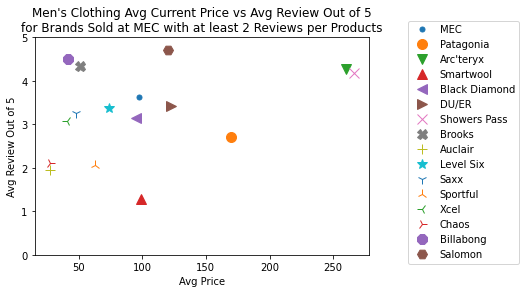

In [500]:
avg_value = []
for brand,marker in zip(brand_list_rev, marker_list_rev):
    price = get_mec_info(menpdar, brand, ('Current_price','mean'))
    avg_review = get_mec_info(menpdar, brand, ('Avg_review_outof5', 'mean'))
    avg_value.append(avg_review)
    plt.plot(price, avg_review, marker, markersize = 10, label = brand)

plt.xlabel('Avg Price')
plt.ylabel('Avg Review Out of 5')
plt.ylim(0,5)
plt.title("Men's Clothing Avg Current Price vs Avg Review Out of 5\nfor Brands Sold at MEC with at least 2 Reviews per Products")
plt.legend(loc = 'right')

ax = plt.gca()
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes);

In [501]:
avg_value

[0    3.635789
 Name: (Avg_review_outof5, mean), dtype: float64,
 1    2.706849
 Name: (Avg_review_outof5, mean), dtype: float64,
 3    4.27
 Name: (Avg_review_outof5, mean), dtype: float64,
 6    1.28
 Name: (Avg_review_outof5, mean), dtype: float64,
 9    3.144444
 Name: (Avg_review_outof5, mean), dtype: float64,
 13    3.428571
 Name: (Avg_review_outof5, mean), dtype: float64,
 14    4.185714
 Name: (Avg_review_outof5, mean), dtype: float64,
 17    4.333333
 Name: (Avg_review_outof5, mean), dtype: float64,
 18    1.95
 Name: (Avg_review_outof5, mean), dtype: float64,
 21    3.375
 Name: (Avg_review_outof5, mean), dtype: float64,
 24    3.266667
 Name: (Avg_review_outof5, mean), dtype: float64,
 25    2.066667
 Name: (Avg_review_outof5, mean), dtype: float64,
 27    3.066667
 Name: (Avg_review_outof5, mean), dtype: float64,
 34    2.1
 Name: (Avg_review_outof5, mean), dtype: float64,
 38    4.5
 Name: (Avg_review_outof5, mean), dtype: float64,
 45    4.7
 Name: (Avg_review_outof5, me

In [502]:
#avg_val = []
#count = 0 
#for i in avg_value:
#    avg_val.append(i[count])
#    count += 1

#avg_val.sort()
#sorted_vals = [custom_round(x, base=5) for x in avg_val]
#minimum = sorted_vals[0]
#maximum = sorted_vals[-1]

In [503]:
#avg_val

In [504]:
men_fw

Brand Current_price                             Discount  \
                           count        mean     min     max    count   
0          Salomon            32  178.084687   69.93  289.95       32   
1             Keen            20  167.751500  119.95  249.95       20   
2          Merrell            20  153.957000   64.93  249.95       20   
3      New Balance            18  143.674444   71.99  209.95       18   
4      La Sportiva            17  319.065882   99.94  729.95       17   
5           Scarpa            15  330.550667  169.95  628.95       15   
6       Timberland            15  135.347333   35.93  199.95       15   
7             Oboz            14  182.092857  144.95  269.95       14   
8           Brooks            13  146.178462  111.93  169.95       13   
9        Arc'teryx            11  204.950000  159.95  339.95       11   
10            Hoka            11  191.768182  149.95  289.95       11   
11        Columbia             8  128.445000   79.93  179.95        8   
12              On             8  192.450000  159.95  219.95        8   
13         Saucony             8  147.946250  111.94  189.95        8   
14  The North Face             7  184.268571  149.94  209.99        7   
15            Teva             7   83.961429   40.94  139.95        7   
16          Vibram             7  157.807143  129.95  184.95        7   
17            Reef             7   43.944286   29.94   69.95        7   
18          Olukai             7  120.664286   84.95  159.95        7   
19       Zamberlan             7  321.378571  219.95  449.95        7   
20            Ecco             7  200.525714  143.98  269.95        7   
21          Kodiak             6  171.280000   47.93  209.95        6   
22             UGG             5  168.946000   74.93  249.95        5   
23           Saola             4   76.447500   59.93   89.93        4   
24            Lowa             4  288.695000  194.94  419.95        4   
25          Vasque             4  202.450000  179.95  239.95        4   
26         Forsake             4  138.695000   79.93  189.95        4   
27           Altra             4  169.950000  139.95  199.95        4   
28            Nike             4  174.950000  154.95  214.95        4   
29   Black Diamond             4  154.950000  119.95  199.95        4   
30          Stance             4   26.835000   19.94   35.95        4   
31          Baffin             3  229.950000  179.95  269.95        3   
32            Bogs             3  129.950000   84.95  174.95        3   
33          Adidas             3  156.616667  129.95  179.95        3   
34         Xtratuf             2  134.950000  109.95  159.95        2   
35      Xero Shoes             2  162.450000  154.95  169.95        2   
36           Asics             2  159.950000  149.95  169.95        2   
37           Chaco             2  107.445000  104.94  109.95        2   
38          Danner             2  148.435000  124.93  171.94        2   
39             CAT             1  111.940000  111.94  111.94        1   
40   Topo Athletic             1   84.930000   84.93   84.93        1   
41          Wigwam             1   48.950000   48.95   48.95        1   
42             MEC             1   11.970000   11.97   11.97        1   
43            Muck             1  229.950000  229.95  229.95        1   
44           Evolv             1   70.930000   70.93   70.93        1   
45     Brave Soles             1   65.940000   65.94   65.94        1   
46           Crocs             1   74.950000   74.95   74.95        1   
47        Sportful             1   29.950000   29.95   29.95        1   
48          Speedo             1   29.950000   29.95   29.95        1   
49           Sorel             1  116.970000  116.97  116.97        1   
50           Kamik             1  144.950000  144.95  144.95        1   
51       Smartwool             1   26.950000   26.95   26.95        1   

                          Avg_review_outof5                     Num_re

In [505]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

In [506]:
#discount_val = []
#count = 0
#for i in discount_value:
#    discount_val.append(i[count])
#    count += 1
    
#discount_val.sort()
#print(type(discount_val.sort()))


#sorted_vals = [custom_round(x, base=5) for x in discount_val]


#minimum = sorted_vals[0]
#maximum = sorted_vals[-1]
#print(minimum, maximum)

In [507]:
#df[('Current_price','count')][df['Brand'] == i]

In [508]:
def plot_discount(df, gender, product_type, markersize_discount, ymin = 0, ymax = 50 ):
    
    
    brand_list_discount = []
    marker_list = ['.','o','v','^','<','>','x','X','+','*','1','2','3','4','8','H','h','p','P','d','D','s','|','_']
    my_list = []
    discount_value = []

    
    for i in df['Brand'][df[('Current_price','count')] >= 5]:
        brand_list_discount.append(i)
    
    if len(brand_list_discount) > 15:
        brand_list_discount = brand_list_discount[:15]
    else:
        pass
    
    
    print(len(brand_list_discount))
    marker_list_discount = marker_list[:(len(brand_list_discount))]
    brand_list_discount.sort()

    for brand,marker in zip(brand_list_discount, marker_list_discount):
        price = get_mec_info(df, brand, 'MSRP')
        discount = get_mec_info(df, brand, ('Discount', 'mean'))
        discount_value.append(discount)
        plt.plot(price, discount, marker, markersize = markersize_discount, label = brand)
    
    
    plt.xlabel('MSRP (CAD $)')
    plt.ylabel('Avg Discount (%)')
    plt.ylim(ymin, ymax)
    plt.title(f"{gender}'s' {product_type} Avg Price vs Avg Discount for Brands\n Sold at MEC with at least 5 Unique Products")
    plt.legend(loc = 'right')

    ax = plt.gca()
    plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes);
    

In [509]:
def plot_rating(df, gender, product_type, markersize_rev, ymin = 0, ymax = 5 ):
    
    brand_list_rev= []
    marker_list = ['.','o','v','^','<','>','x','X','+','*','1','2','3','4','8','H','h','p','P','d','D','s','|','_']
    
    for i in df['Brand'][df[('Num_reviews','mean')] >= 2]:
        brand_list_rev.append(i)
 
    if len(brand_list_rev) > 15:
        brand_list_rev = brand_list_rev[:15]
    else:
        pass
    
    brand_list_rev.sort()
    print(len(brand_list_rev))
    marker_list_rev = marker_list[:(len(brand_list_rev))]
    

    for brand,marker in zip(brand_list_rev, marker_list_rev):
        price = get_mec_info(df, brand, 'MSRP')
        avg_review = get_mec_info(df, brand, ('Avg_review_outof5', 'mean'))
        plt.plot(price, avg_review, marker, markersize = markersize_rev, label = brand)    

    plt.xlabel('MSRP (CAD $)')
    plt.ylabel('Avg Review Out of 5')
    plt.ylim(ymin, ymax)
    plt.title(f"{gender}'s {product_type} Avg Current Price vs Avg Review Out of 5 for\n Brands Sold at MEC with at least 2 Reviews per Products")
    plt.legend(loc = 'right')

    ax = plt.gca()
    plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes);
        
        

In [510]:
def plot_rating_discount(df, gender, product_type, markersize_rev, ymin = 0, ymax = 5 ):
    
    brand_list_rev= []
    marker_list = ['.','o','v','^','<','>','x','X','+','*','1','2','3','4','8','H','h','p','P','d','D','s','|','_']
    
    for i in df['Brand'][df[('Num_reviews','mean')] >= 2]:
        brand_list_rev.append(i)
 
    if len(brand_list_rev) > 15:
        brand_list_rev = brand_list_rev[:15]
    else:
        pass
    
    brand_list_rev.sort()
    print(len(brand_list_rev))
    marker_list_rev = marker_list[:(len(brand_list_rev))]
    

    for brand,marker in zip(brand_list_rev, marker_list_rev):
        price = get_mec_info(df, brand, ('Discount','mean'))
        avg_review = get_mec_info(df, brand, ('Avg_review_outof5', 'mean'))
        plt.plot(price, avg_review, marker, markersize = markersize_rev, label = brand)    

    plt.xlabel('Avg Discount (%)')
    plt.ylabel('Avg Review Out of 5')
    plt.ylim(ymin, ymax)
    plt.title(f"{gender}'s {product_type} Avg Discount vs Avg Review Out of 5 for\n Brands Sold at MEC with at least 2 Reviews per Products")
    plt.legend(loc = 'right')

    ax = plt.gca()
    plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes);

In [511]:
df_bar = df['Brand'][df['Product_category'] == 'clothing'].value_counts()
df_bar = df_bar.to_frame()
df_bar = df_bar / df_bar.sum() * 100
df_bar

,Brand
MEC,20.787746
Patagonia,15.973742
The North Face,8.096280
Arc'teryx,6.564551
Fjallraven,6.345733
Prana,5.470460
Smartwool,3.282276
Vuori,3.063457
Picture,1.969365
Black Diamond,1.969365


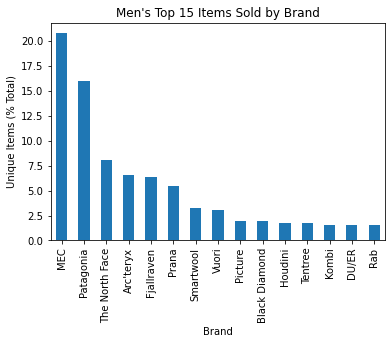

In [512]:
df_bar.iloc[:15].plot(kind='bar', legend = None)

plt.xlabel('Brand')
plt.ylabel('Unique Items (% Total)')
plt.title("Men's Top 15 Items Sold by Brand");

15


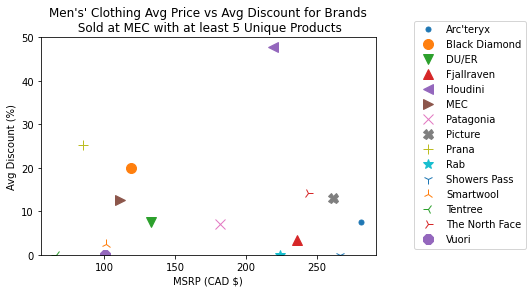

In [513]:
plot_discount(menpdar,'Men','Clothing', 10, 0, 50)

15


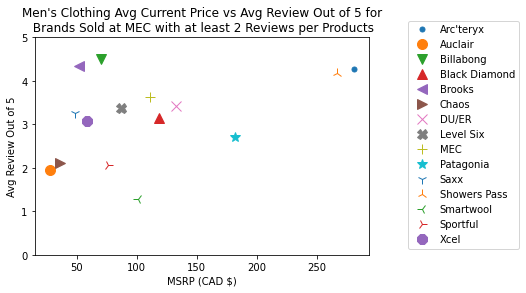

In [514]:
plot_rating(menpdar,'Men', 'Clothing', 10)

15


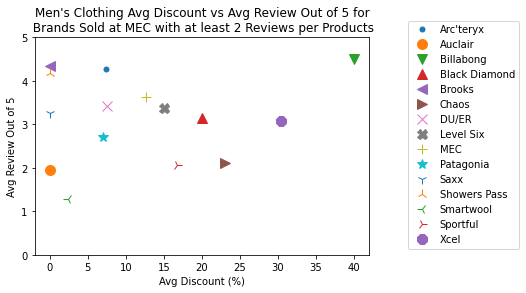

In [515]:
plot_rating_discount(menpdar,'Men', 'Clothing', 10)

In [516]:
men_fw = df[df['Product_category'] == 'footwear'].groupby('Brand').agg({'Current_price': ['count', 'mean', 'min', 'max'],
                         'Discount': ['count', 'mean', 'min', 'max'],
                         'Avg_review_outof5': ['count', 'mean', 'min', 'max'],
                         'Num_reviews': ['count', 'mean', 'min', 'max']}).sort_values(('Current_price', 'count'), ascending=False)

men_fw = men_fw.reset_index()

In [517]:
men_fw['Discount_percent'] = 1 - (men_fw[('Discount','mean')] / 100)

men_fw['MSRP'] = men_fw[('Current_price','mean')] / men_fw[('Discount_percent')]

men_fw

Brand Current_price                             Discount  \
                           count        mean     min     max    count   
0          Salomon            32  178.084687   69.93  289.95       32   
1             Keen            20  167.751500  119.95  249.95       20   
2          Merrell            20  153.957000   64.93  249.95       20   
3      New Balance            18  143.674444   71.99  209.95       18   
4      La Sportiva            17  319.065882   99.94  729.95       17   
5           Scarpa            15  330.550667  169.95  628.95       15   
6       Timberland            15  135.347333   35.93  199.95       15   
7             Oboz            14  182.092857  144.95  269.95       14   
8           Brooks            13  146.178462  111.93  169.95       13   
9        Arc'teryx            11  204.950000  159.95  339.95       11   
10            Hoka            11  191.768182  149.95  289.95       11   
11        Columbia             8  128.445000   79.93  179.95        8   
12              On             8  192.450000  159.95  219.95        8   
13         Saucony             8  147.946250  111.94  189.95        8   
14  The North Face             7  184.268571  149.94  209.99        7   
15            Teva             7   83.961429   40.94  139.95        7   
16          Vibram             7  157.807143  129.95  184.95        7   
17            Reef             7   43.944286   29.94   69.95        7   
18          Olukai             7  120.664286   84.95  159.95        7   
19       Zamberlan             7  321.378571  219.95  449.95        7   
20            Ecco             7  200.525714  143.98  269.95        7   
21          Kodiak             6  171.280000   47.93  209.95        6   
22             UGG             5  168.946000   74.93  249.95        5   
23           Saola             4   76.447500   59.93   89.93        4   
24            Lowa             4  288.695000  194.94  419.95        4   
25          Vasque             4  202.450000  179.95  239.95        4   
26         Forsake             4  138.695000   79.93  189.95        4   
27           Altra             4  169.950000  139.95  199.95        4   
28            Nike             4  174.950000  154.95  214.95        4   
29   Black Diamond             4  154.950000  119.95  199.95        4   
30          Stance             4   26.835000   19.94   35.95        4   
31          Baffin             3  229.950000  179.95  269.95        3   
32            Bogs             3  129.950000   84.95  174.95        3   
33          Adidas             3  156.616667  129.95  179.95        3   
34         Xtratuf             2  134.950000  109.95  159.95        2   
35      Xero Shoes             2  162.450000  154.95  169.95        2   
36           Asics             2  159.950000  149.95  169.95        2   
37           Chaco             2  107.445000  104.94  109.95        2   
38          Danner             2  148.435000  124.93  171.94        2   
39             CAT             1  111.940000  111.94  111.94        1   
40   Topo Athletic             1   84.930000   84.93   84.93        1   
41          Wigwam             1   48.950000   48.95   48.95        1   
42             MEC             1   11.970000   11.97   11.97        1   
43            Muck             1  229.950000  229.95  229.95        1   
44           Evolv             1   70.930000   70.93   70.93        1   
45     Brave Soles             1   65.940000   65.94   65.94        1   
46           Crocs             1   74.950000   74.95   74.95        1   
47        Sportful             1   29.950000   29.95   29.95        1   
48          Speedo             1   29.950000   29.95   29.95        1   
49           Sorel             1  116.970000  116.97  116.97        1   
50           Kamik             1  144.950000  144.95  144.95        1   
51       Smartwool             1   26.950000   26.95   26.95        1   

                          Avg_review_outof5                     Num_re

15


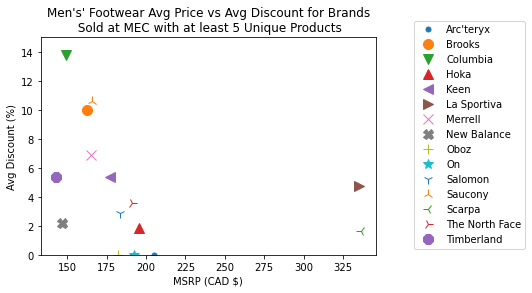

In [518]:
plot_discount(men_fw,'Men','Footwear', 10, 0, 15)

15


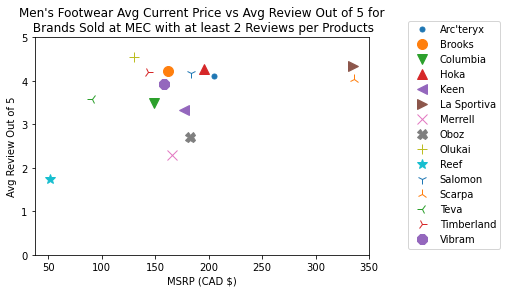

In [519]:
plot_rating(men_fw,'Men','Footwear', 10)

15


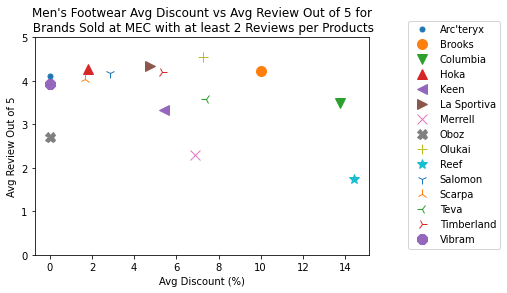

In [520]:
plot_rating_discount(men_fw,'Men','Footwear', 10)

In [521]:
womensproducts = pd.read_csv('women_mec_info_2020-10-17.csv') #contains clothing and footwear
womensproducts = womensproducts.rename(columns={'Unnamed: 0': 'Product_name'})

In [522]:
womensproducts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product_name       1122 non-null   object
 1   Brand              1123 non-null   object
 2   Current_price      1123 non-null   object
 3   Discount           1123 non-null   object
 4   Avg_review_outof5  1123 non-null   object
 5   Num_reviews        1123 non-null   object
 6   Product_category   1123 non-null   object
 7   Date_retrieved     1123 non-null   object
dtypes: object(8)
memory usage: 70.3+ KB


In [523]:
a = pd.to_numeric(womensproducts['Current_price'], errors='coerce')
b = pd.to_numeric(womensproducts['Discount'], errors='coerce')
c = pd.to_numeric(womensproducts['Avg_review_outof5'], errors='coerce')
d = pd.to_numeric(womensproducts['Num_reviews'], errors='coerce')
e = pd.to_datetime(womensproducts['Date_retrieved'], errors='coerce')

womensproducts['Current_price'] = a
womensproducts['Discount'] = b
womensproducts['Avg_review_outof5'] = c
womensproducts['Num_reviews'] = d
womensproducts['Date_retrieved'] = e

In [524]:
womensproducts.info() #note: datetime64[ns] means non-specific

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product_name       1122 non-null   object        
 1   Brand              1123 non-null   object        
 2   Current_price      1122 non-null   float64       
 3   Discount           1122 non-null   float64       
 4   Avg_review_outof5  1122 non-null   float64       
 5   Num_reviews        1122 non-null   float64       
 6   Product_category   1123 non-null   object        
 7   Date_retrieved     1122 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 70.3+ KB


In [525]:
dfw = womensproducts

In [526]:
womenpdar = dfw[dfw['Product_category'] == 'clothing'].groupby('Brand').agg({'Current_price': ['count', 'mean', 'min', 'max'],
                         'Discount': ['mean', 'min', 'max'],
                         'Avg_review_outof5': ['mean', 'min', 'max'],
                         'Num_reviews': ['mean', 'min', 'max']}).sort_values(('Current_price', 'count'), ascending=False)

womenpdar = womenpdar.reset_index()

In [527]:
womenpdar['Discount_percent'] = 1 - (womenpdar[('Discount','mean')] / 100)

womenpdar['MSRP'] = womenpdar[('Current_price','mean')] / womenpdar[('Discount_percent')]

womenpdar

Brand Current_price                               Discount        \
                           count        mean     min     max       mean   min   
0              MEC           104   85.786538    8.93  399.95  17.048077   0.0   
1        Patagonia            67  154.782388   24.00  749.00  10.164179   0.0   
2   The North Face            56  137.559821   25.19  699.99  24.285714   0.0   
3        Arc'teryx            36  259.809444   62.94  599.95   9.444444   0.0   
4       Darn Tough            33   28.192121   17.95   36.95   0.939394   0.0   
..             ...           ...         ...     ...     ...        ...   ...   
59           Rains             1  159.950000  159.95  159.95   0.000000   0.0   
60          Phelps             1  299.950000  299.95  299.95   0.000000   0.0   
61          Karpos             1   39.940000   39.94   39.94  43.000000  43.0   
62      WrightSock             1   17.950000   17.95   17.95   0.000000   0.0   
63          Ambler             1   19.580000   19.58   19.58  44.000000  44.0   

         Avg_review_outof5           Num_reviews             Discount_percent  \
     max              mean  min  max        mean  min    max                    
0   72.0          3.381731  0.0  5.0    8.153846  0.0   78.0         0.829519   
1   60.0          2.908955  0.0  5.0    2.462687  0.0   18.0         0.898358   
2   60.0          1.676786  0.0  5.0    1.017857  0.0   24.0         0.757143   
3   30.0          4.280556  0.0  5.0   24.138889  0.0  161.0         0.905556   
4   31.0          1.954545  0.0  5.0    1.727273  0.0   16.0         0.990606   
..   ...               ...  ...  ...         ...  ...    ...              ...   
59   0.0          5.000000  5.0  5.0    1.000000  1.0    1.0         1.000000   
60   0.0          1.000000  1.0  1.0    3.000000  3.0    3.0         1.000000   
61  43.0          0.000000  0.0  0.0    0.000000  0.0    0.0         0.570000   
62   0.0          5.000000  5.0  5.0    2.000000  2.0    2.0         1.000000   
63  44.0          3.500000  3.5  3.5    2.000000  2.0    2.0         0.560000   

          MSRP  
                
0   103.417179  
1   172.294733  
2   181.682783  
3   286.906135  
4    28.459468  
..         ...  
59  159.950000  
60  299.950000  
61   70.070175  
62   17.950000  
63   34.964286  

[64 rows x 16 columns]

In [528]:
dfw_bar = dfw['Brand'][dfw['Product_category'] == 'clothing'].value_counts()
dfw_bar = dfw_bar.to_frame()
dfw_bar = dfw_bar / dfw_bar.sum() * 100
dfw_bar

,Brand
MEC,15.902141
Patagonia,10.244648
The North Face,8.562691
Arc'teryx,5.504587
Darn Tough,5.045872
...,...
Sunday Afternoons,0.152905
WrightSock,0.152905
Suncloud,0.152905
Spiritual Gangster,0.152905


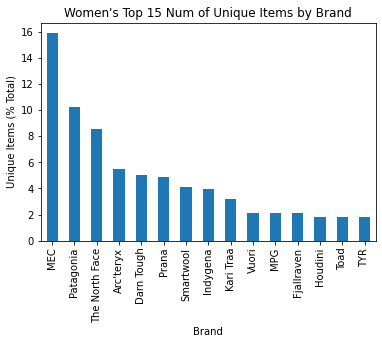

In [529]:
dfw_bar.iloc[:15].plot(kind='bar', legend = None)

plt.xlabel('Brand')
plt.ylabel('Unique Items (% Total)')
plt.title("Women's Top 15 Num of Unique Items by Brand");

In [530]:
men_clothing= df[df['Product_category'] == 'clothing']
men_clothing['Gender'] = 'Men'

men_clothing

women_clothing=dfw[dfw['Product_category'] == 'clothing']
women_clothing['Gender'] = 'Women'

women_clothing

<ipython-input-530-00f1ee14e54a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-530-00f1ee14e54a>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Product_name,Brand,Current_price,Discount,Avg_review_outof5,Num_reviews,Product_category,Date_retrieved,Gender
0,The North Face Hikesteller Futurelight Parka -...,The North Face,379.99,0.0,0.0,0.0,clothing,2020-10-17,Women
1,MEC Great Northern Down Parka - Women's,MEC,359.95,0.0,3.9,15.0,clothing,2020-10-17,Women
2,MEC Stargazer Fleece Pullover - Women's,MEC,74.95,0.0,4.6,17.0,clothing,2020-10-17,Women
3,Patagonia Micro Puff Hoody - Women's,Patagonia,375.00,0.0,4.8,4.0,clothing,2020-10-17,Women
4,Patagonia Silent Down Jacket - Women's,Patagonia,315.00,0.0,5.0,1.0,clothing,2020-10-17,Women
...,...,...,...,...,...,...,...,...,...
649,Rab Nexus Jacket - Women's,Rab,139.95,0.0,3.0,1.0,clothing,2020-10-17,Women
650,Showers Pass Refuge Waterproof Cycling Pants -...,Showers Pass,299.95,0.0,3.0,2.0,clothing,2020-10-17,Women
651,Mammut Courmayeur SO Pants - Women's,Mammut,184.78,44.0,2.5,2.0,clothing,2020-10-17,Women
652,Prana Alberta Reversible Sweater - Women's,Prana,63.20,55.0,1.0,1.0,clothing,2020-10-17,Women


In [531]:
df_men = df
df_men['Gender'] = 'Men'


df_women = dfw
df_women['Gender'] = 'Women'

In [532]:
clothing_footwear_mw = pd.concat([df_men, df_women])
#clothing_footwear_mw = clothing_footwear_mw.drop(columns={'index'})
list(clothing_footwear_mw[clothing_footwear_mw['Product_name'].isnull()].index)

[0, 459, 654]

In [533]:
clothing_footwear_mw = clothing_footwear_mw.drop(index = 654)
list(clothing_footwear_mw[clothing_footwear_mw['Product_name'].isnull()].index)

[0, 459]

In [534]:
#histogram of how many products are sold at mec at varying price ranges

#sns.displot(clothing_mw, x = 'Current_price', bins = [0,100,200,300, 400,500,600,700,800],\
#            hue = 'Gender', multiple ="dodge")

#plt.xlabel('Price')
#plt.title("Distribution of Clothing Items Sold at MEC")
#plt.legend();


In [535]:
#sns.displot(footwear_mw, x = 'Current_price', bins = [0,100,200,300, 400,500,600,700,800],\
#            hue = 'Gender', multiple ="dodge")

#plt.xlabel('Price')
#plt.title("Distribution of Footwear Items Sold at MEC")
#plt.legend();

No handles with labels found to put in legend.


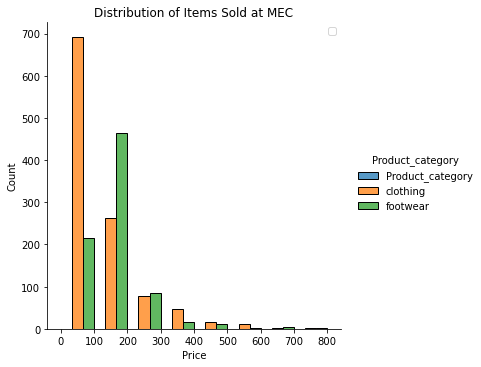

In [536]:
sns.displot(clothing_footwear_mw, x = 'Current_price', bins = [0,100,200,300, 400,500,600,700,800],\
            hue = 'Product_category', multiple ="dodge")

plt.xlabel('Price')
plt.title("Distribution of Items Sold at MEC")
plt.legend();

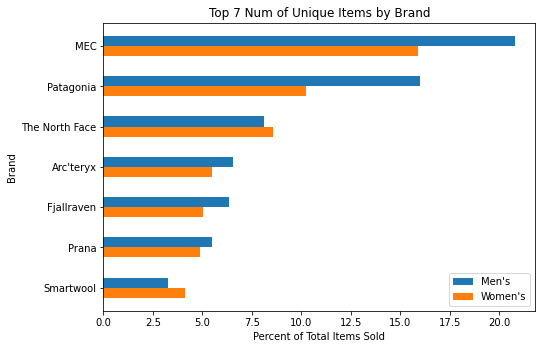

In [558]:
w = 0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

Brand = [df_bar.index[:7], df_bar.index[:7]]
Percent_of_Total = [df_bar['Brand'][:7], dfw_bar['Brand'][:7]] 

bar1 = np.arange(len(Brand[0]))
bar2 = [i + w for i in bar1]

ax.barh(bar1, Percent_of_Total[0], w, label = "Men's")
ax.barh(bar2, Percent_of_Total[1], w, label = "Women's")

ax.invert_yaxis()
plt.yticks(bar1+w/2, Brand[0])
plt.legend()
plt.xlabel('Percent of Total Items Sold')
plt.ylabel('Brand')
plt.title("Top 7 Num of Unique Items by Brand");
plt.show()

In [538]:
import numpy as np

15


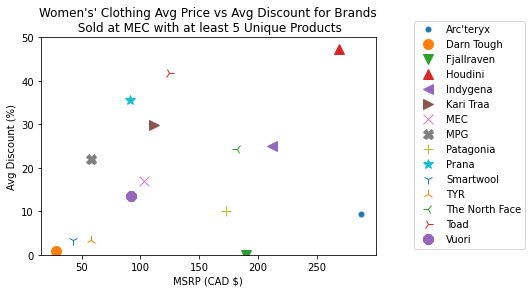

In [539]:
plot_discount(womenpdar,'Women','Clothing', 10, 0, 50)

15


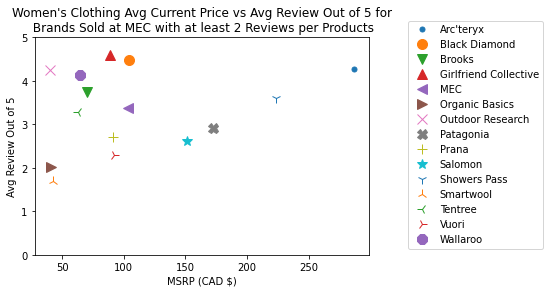

In [540]:
plot_rating(womenpdar,'Women','Clothing', 10)

15


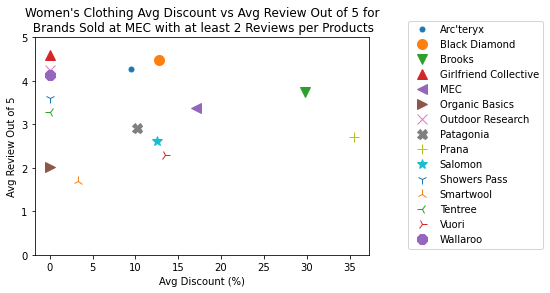

In [541]:
plot_rating_discount(womenpdar,'Women', 'Clothing', 10)

In [542]:
women_fw = dfw[dfw['Product_category'] == 'footwear'].groupby('Brand').agg({'Current_price': ['count', 'mean', 'min', 'max'],
                         'Discount': ['count', 'mean', 'min', 'max'],
                         'Avg_review_outof5': ['count', 'mean', 'min', 'max'],
                         'Num_reviews': ['count', 'mean', 'min', 'max']}).sort_values(('Current_price', 'count'), ascending=False)

women_fw = women_fw.reset_index()

women_fw['Discount_percent'] = 1 - (women_fw[('Discount','mean')] / 100)

women_fw['MSRP'] = women_fw[('Current_price','mean')] / women_fw[('Discount_percent')]

women_fw

Brand Current_price                             Discount  \
                           count        mean     min     max    count   
0       Darn Tough            33   28.192121   17.95   36.95       33   
1             Keen            33  144.657879   60.00  249.95       33   
2          Salomon            33  172.095758   69.93  289.95       33   
3          Merrell            24  135.486250   49.93  229.95       24   
4        Smartwool            19   25.528947   17.95   34.95       19   
..             ...           ...         ...     ...     ...      ...   
60  Royal Canadian             1  249.950000  249.95  249.95        1   
61       Superfeet             1   59.950000   59.95   59.95        1   
62          Danner             1  114.930000  114.93  114.93        1   
63        Sportful             1   24.950000   24.95   24.95        1   
64     Canada West             1  181.940000  181.94  181.94        1   

                          Avg_review_outof5                     Num_reviews  \
         mean   min   max             count      mean  min  max       count   
0    0.939394   0.0  31.0                33  1.954545  0.0  5.0          33   
1    7.939394   0.0  60.0                33  2.415152  0.0  5.0          33   
2    2.606061   0.0  44.0                33  3.696970  0.0  5.0          33   
3   15.000000   0.0  50.0                24  2.537500  0.0  5.0          24   
4    0.000000   0.0   0.0                19  2.010526  0.0  5.0          19   
..        ...   ...   ...               ...       ...  ...  ...         ...   
60   0.000000   0.0   0.0                 1  0.000000  0.0  0.0           1   
61   0.000000   0.0   0.0                 1  4.700000  4.7  4.7           1   
62  50.000000  50.0  50.0                 1  4.000000  4.0  4.0           1   
63   0.000000   0.0   0.0                 1  4.000000  4.0  4.0           1   
64  30.000000  30.0  30.0                 1  4.500000  4.5  4.5           1   

                          Discount_percent        MSRP  
         mean   min   max                               
0    1.727273   0.0  16.0         0.990606   28.459468  
1    4.515152   0.0  46.0         0.920606  157.133311  
2   14.393939   0.0  64.0         0.973939  176.700685  
3    3.083333   0.0  22.0         0.850000  159.395588  
4   20.578947   0.0  86.0         1.000000   25.528947  
..        ...   ...   ...              ...         ...  
60   0.000000   0.0   0.0         1.000000  249.950000  
61  36.000000  36.0  36.0         1.000000   59.950000  
62   1.000000   1.0   1.0         0.500000  229.860000  
63   2.000000   2.0   2.0         1.000000   24.950000  
64   4.000000   4.0   4.0         0.700000  259.914286  

[65 rows x 19 columns]

15


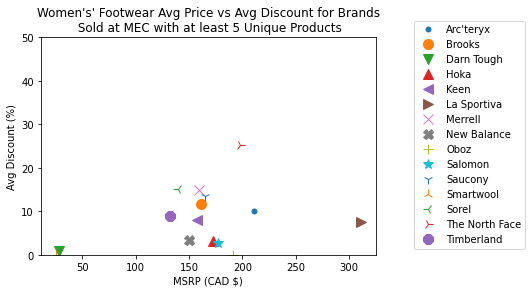

In [543]:
plot_discount(women_fw,'Women','Footwear', 10, 0, 50)

15


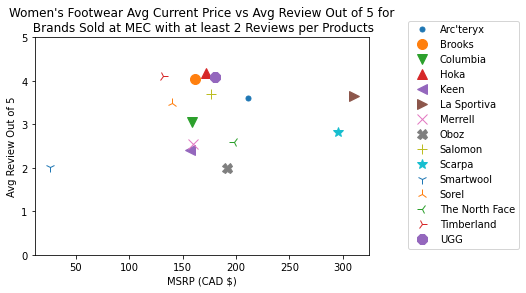

In [544]:
plot_rating(women_fw,'Women','Footwear', 10)

15


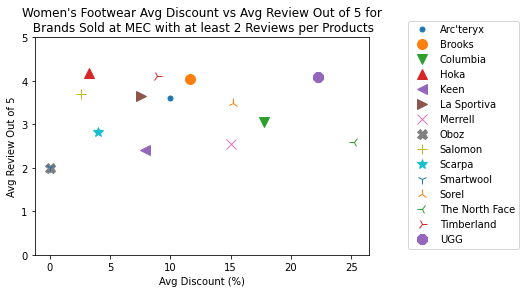

In [545]:
plot_rating_discount(women_fw,'Women','Footwear', 10)

C:\Users\ernes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ernes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



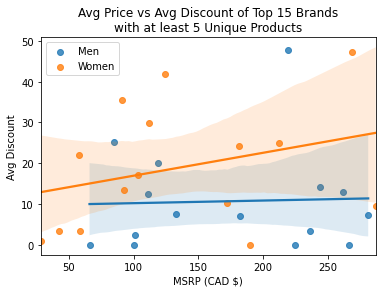

In [546]:
sns.regplot(menpdar['MSRP'].iloc[:15], menpdar[('Discount', 'mean')].iloc[:15], label = 'Men')
sns.regplot(womenpdar['MSRP'].iloc[:15], womenpdar[('Discount', 'mean')].iloc[:15], label = 'Women')

plt.title('Avg Price vs Avg Discount of Top 15 Brands\nwith at least 5 Unique Products')
plt.xlabel('MSRP (CAD $)')
plt.ylabel('Avg Discount')
plt.legend();

In [552]:
menpdar_reg = menpdar[['Brand', 'Discount','Avg_review_outof5', 'Num_reviews', 'MSRP']][menpdar[('Num_reviews','mean')] >= 2]
womenpdar_reg = womenpdar[['Brand', 'Discount','Avg_review_outof5', 'Num_reviews', 'MSRP']][womenpdar[('Num_reviews','mean')] >= 2]

In [553]:
menpdar_reg

Brand   Discount             Avg_review_outof5            \
                        mean   min   max              mean  min  max   
0             MEC  12.578947   0.0  68.0          3.635789  0.0  5.0   
1       Patagonia   6.986301   0.0  30.0          2.706849  0.0  5.0   
3       Arc'teryx   7.433333   0.0  50.0          4.270000  0.0  5.0   
6       Smartwool   2.400000   0.0  36.0          1.280000  0.0  5.0   
9   Black Diamond  20.000000   0.0  52.0          3.144444  0.0  4.8   
13          DU/ER   7.571429   0.0  53.0          3.428571  0.0  5.0   
14   Showers Pass   0.000000   0.0   0.0          4.185714  2.5  4.7   
17         Brooks   0.000000   0.0   0.0          4.333333  3.9  4.9   
18        Auclair   0.000000   0.0   0.0          1.950000  0.0  3.8   
21      Level Six  15.000000   0.0  30.0          3.375000  0.0  5.0   
24           Saxx   0.000000   0.0   0.0          3.266667  0.0  5.0   
25       Sportful  16.666667   0.0  50.0          2.066667  0.0  4.0   
27           Xcel  30.333333  30.0  31.0          3.066667  0.0  4.7   
34          Chaos  23.000000   0.0  46.0          2.100000  0.0  4.2   
38      Billabong  40.000000  40.0  40.0          4.500000  4.5  4.5   
45        Salomon   0.000000   0.0   0.0          4.700000  4.7  4.7   

   Num_reviews                     MSRP  
          mean   min    max              
0     7.600000   0.0   56.0  111.328597  
1     2.164384   0.0   17.0  182.055965  
3    50.266667   0.0  396.0  281.076341  
6     4.533333   0.0   38.0  101.084016  
9    10.888889   0.0   27.0  118.822222  
13    4.285714   0.0   10.0  132.709428  
14   41.000000   2.0  111.0  266.378571  
17   16.666667  10.0   30.0   51.450000  
18    2.750000   0.0    9.0   27.450000  
21    2.250000   0.0    6.0   86.705882  
24    4.333333   0.0   12.0   48.283333  
25    2.333333   0.0    6.0   75.932000  
27    2.333333   0.0    4.0   58.287081  
34    6.500000   0.0   13.0   36.285714  
38    4.000000   4.0    4.0   69.883333  
45    3.000000   3.0    3.0  119.950000

In [554]:
womenpdar_reg

Brand   Discount             Avg_review_outof5            \
                                mean   min   max              mean  min  max   
0                     MEC  17.048077   0.0  72.0          3.381731  0.0  5.0   
1               Patagonia  10.164179   0.0  60.0          2.908955  0.0  5.0   
3               Arc'teryx   9.444444   0.0  30.0          4.280556  0.0  5.0   
5                   Prana  35.531250   0.0  60.0          2.709375  0.0  5.0   
6               Smartwool   3.333333   0.0  50.0          1.688889  0.0  5.0   
9                   Vuori  13.500000   0.0  51.0          2.300000  0.0  5.0   
17                Tentree   0.000000   0.0   0.0          3.287500  0.0  5.0   
19               Wallaroo   0.000000   0.0   0.0          4.128571  0.0  5.0   
27                 Brooks  29.800000   0.0  68.0          3.740000  2.2  4.3   
30                Salomon  12.500000   0.0  50.0          2.625000  0.0  4.2   
31         Organic Basics   0.000000   0.0   0.0          2.025000  0.0  4.1   
35          Black Diamond  12.750000   0.0  51.0          4.475000  4.1  5.0   
44           Showers Pass   0.000000   0.0   0.0          3.600000  3.0  4.0   
51       Outdoor Research   0.000000   0.0   0.0          4.250000  3.5  5.0   
53  Girlfriend Collective   0.000000   0.0   0.0          4.600000  4.2  5.0   
54                Auclair  22.000000   0.0  44.0          3.500000  3.0  4.0   
56               Suncloud   0.000000   0.0   0.0          3.800000  3.8  3.8   
57      Sunday Afternoons   0.000000   0.0   0.0          4.700000  4.7  4.7   
60                 Phelps   0.000000   0.0   0.0          1.000000  1.0  1.0   
62             WrightSock   0.000000   0.0   0.0          5.000000  5.0  5.0   
63                 Ambler  44.000000  44.0  44.0          3.500000  3.5  3.5   

   Num_reviews                     MSRP  
          mean   min    max              
0     8.153846   0.0   78.0  103.417179  
1     2.462687   0.0   18.0  172.294733  
3    24.138889   0.0  161.0  286.906135  
5     6.406250   0.0  119.0   91.242850  
6    16.703704   0.0   86.0   42.516092  
9     2.214286   0.0   17.0   92.364162  
17    3.375000   0.0    8.0   63.200000  
19    5.571429   0.0   15.0   64.235714  
27   85.600000   3.0  175.0   69.960114  
30    2.000000   0.0    4.0  151.365714  
31    4.250000   0.0   14.0   41.200000  
35   17.750000   1.0   37.0  103.948424  
44    2.666667   2.0    4.0  223.283333  
51    2.500000   2.0    3.0   39.950000  
53    3.000000   1.0    5.0   88.950000  
54    2.000000   1.0    3.0   26.365385  
56    5.000000   5.0    5.0   59.950000  
57   12.000000  12.0   12.0   49.950000  
60    3.000000   3.0    3.0  299.950000  
62    2.000000   2.0    2.0   17.950000  
63    2.000000   2.0    2.0   34.964286

C:\Users\ernes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ernes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



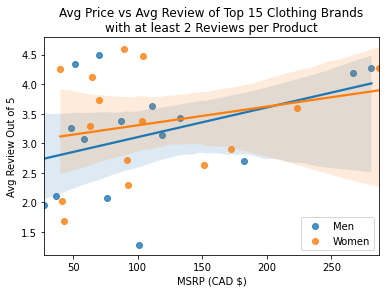

In [555]:
sns.regplot(menpdar_reg['MSRP'].iloc[:15], menpdar_reg[('Avg_review_outof5', 'mean')].iloc[:15], label = 'Men')
sns.regplot(womenpdar_reg['MSRP'].iloc[:15], womenpdar_reg[('Avg_review_outof5', 'mean')].iloc[:15], label = 'Women')

plt.title('Avg Price vs Avg Review of Top 15 Clothing Brands\nwith at least 2 Reviews per Product')
plt.xlabel('MSRP (CAD $)')
plt.ylabel('Avg Review Out of 5')
plt.legend();

C:\Users\ernes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ernes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



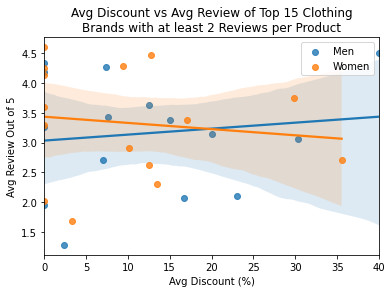

In [556]:
sns.regplot(menpdar_reg[('Discount','mean')].iloc[:15], menpdar_reg[('Avg_review_outof5', 'mean')].iloc[:15], label = 'Men')
sns.regplot(womenpdar_reg[('Discount','mean')].iloc[:15], womenpdar_reg[('Avg_review_outof5', 'mean')].iloc[:15], label = 'Women')

plt.title('Avg Discount vs Avg Review of Top 15 Clothing\nBrands with at least 2 Reviews per Product')
plt.xlabel('Avg Discount (%)')
plt.ylabel('Avg Review Out of 5')
plt.legend();

In [ ]:
# mens and womens footwear side by side?

sns.regplot(men_fw['MSRP'].iloc[:15], men_fw[('Discount', 'mean')].iloc[:15], label = 'Men')
sns.regplot(women_fw['MSRP'].iloc[:15], women_fw[('Discount', 'mean')].iloc[:15], label = 'Women')

plt.title('Avg Price vs Avg Discount of Top 15 Footwear Brands\nwith at least 5 Unique Products')
plt.xlabel('MSRP (CAD $)')
plt.ylabel('Avg Discount')
plt.legend();

In [ ]:
sns.regplot(men_fw['MSRP'].iloc[:15], men_fw[('Avg_review_outof5', 'mean')].iloc[:15], label = 'Men')
sns.regplot(women_fw['MSRP'].iloc[:15], women_fw[('Avg_review_outof5', 'mean')].iloc[:15], label = 'Women')

plt.title('Avg Price vs Avg Review of Top 15 Footwear\nwith at least 2 Reviews per Product')
plt.xlabel('MSRP (CAD $)')
plt.ylabel('Avg Review Out of 5')
plt.legend();

## Analyzing Categories

In [ ]:
df_sc = pd.read_csv('clothingsubcat_mec_info_2020-10-20.csv') 
df_sc = df_sc.rename(columns={'Unnamed: 0': 'Product_name'})

a = pd.to_numeric(df_sc['Current_price'], errors='coerce')
b = pd.to_numeric(df_sc['Discount'], errors='coerce')
c = pd.to_numeric(df_sc['Avg_review_outof5'], errors='coerce')
d = pd.to_numeric(df_sc['Num_reviews'], errors='coerce')
e = pd.to_datetime(df_sc['Date_retrieved'], errors='coerce')

df_sc['Current_price'] = a
df_sc['Discount'] = b
df_sc['Avg_review_outof5'] = c
df_sc['Num_reviews'] = d
df_sc['Date_retrieved'] = e

df_sc.info() 

In [ ]:
df_sc['Discount_percent'] = 1 - (df_sc[('Discount')] / 100)

df_sc['MSRP'] = df_sc['Current_price'] / df_sc[('Discount_percent')]

df_sc

In [ ]:
for num in list(df_sc[df_sc['Product_name'].isnull()].index):
    df_sc = df_sc.drop(index = num)

In [ ]:
df_sc.set_index('Subcategory').drop(columns ={'Date_retrieved', 'Product_name'})
df_sc.reset_index()

In [ ]:
Product_subcat_list = list(df_sc['Subcategory'].unique())

Product_subcat_list.sort()

print(len(Product_subcat_list))
Product_subcat_list

In [ ]:
def get_MEC_Percent(df, product_activity_list):
    
    df_total_count = df.groupby('Subcategory').agg('count').sort_values('Product_name',ascending=False).reset_index()

#    activity_total.sum()
    
    activity_list = []
    
    for i in product_activity_list:
        activity_total = df_total_count[['Product_name']][df_total_count['Subcategory'] == f'{i}']

        activity = df[df['Subcategory'] == f'{i}'][['Brand', 'Product_name','Subcategory']].groupby(['Subcategory','Brand'], as_index=False)\
        .agg('count').sort_values('Product_name',ascending=False).iloc[:100]
    
        activity = activity[activity['Brand'] == 'MEC']
    
        activity_PerTotal = activity[['Product_name']] / activity_total.sum()*100
        activity_merged = pd.merge(activity, activity_PerTotal, left_index=True, right_index=True, how = 'outer')
        activity_merged = activity_merged.rename(columns={'Product_name_x':'Count','Product_name_y':'Percent_total' })    
    
        activity_list.append(activity_merged)
        
    
    activity_df = pd.concat(activity_list)      
    
    return activity_df

In [ ]:
MEC_subcat = get_MEC_Percent(df_sc, Product_subcat_list)
df_sc_MEC = MEC_subcat.sort_values('Subcategory')

df_sc_MEC

In [ ]:
def bar_plot_subcat(df):
    values = np.array(df['Brand'])

    sns.barplot(x = df['Percent_total'], y = df['Subcategory']) 

    plt.xlabel('Percent of Total Products Sold (%)')
    plt.title(f'Percent of MEC Products Sold vs by Clothing Category ')
    
bar_plot_subcat(df_sc_MEC)

In [ ]:
def df_stats(df, subcat):

    df_sc1 = df[df['Subcategory'] == f'{subcat}'].groupby('Brand').agg({'Current_price': ['count', 'mean', 'min', 'max'],
                             'Discount': ['mean', 'min', 'max'],
                             'Avg_review_outof5': ['mean', 'min', 'max'],
                             'Num_reviews': ['mean', 'min', 'max']}).sort_values(('Current_price', 'count'), ascending=False)

    df_sc1 = df_sc1.reset_index()

    df_sc1['Discount_percent'] = 1 - (df_sc1[('Discount','mean')] / 100)

    df_sc1['MSRP'] = df_sc1[('Current_price','mean')] / df_sc1[('Discount_percent')]

    return df_sc1

In [ ]:
df_sc1 = df_stats(df_sc, 'base-layers-and-underwear')
df_sc2 = df_stats(df_sc, 'bottoms')

In [ ]:
def plot_rating_sc(df, gender, product_type, markersize_rev = 10, ymin = 0, ymax = 5.5 ):
    
    brand_list_rev= []
    marker_list = ['.','o','v','^','<','>','x','X','+','*','1','2','3','4','8','H','h','p','P','d','D','s','|','_']
    
    for i in df['Brand'][df[('Num_reviews','mean')] >= 0]:
        brand_list_rev.append(i)
 
    if len(brand_list_rev) > 15:
        brand_list_rev = brand_list_rev[:15]
    else:
        pass
    
    brand_list_rev.sort()
    print(len(brand_list_rev))
    marker_list_rev = marker_list[:(len(brand_list_rev))]
    

    for brand,marker in zip(brand_list_rev, marker_list_rev):
        price = get_mec_info(df, brand, 'MSRP')
        avg_review = get_mec_info(df, brand, ('Avg_review_outof5', 'mean'))
        plt.plot(price, avg_review, marker, markersize = markersize_rev, label = brand)    

    plt.xlabel('MSRP (CAD $)')
    plt.ylabel('Avg Review Out of 5')
    plt.ylim(ymin, ymax)
    plt.title(f"{gender}'s {product_type} Avg Current Price vs Avg Review Out of 5 for\n Brands Sold at MEC with at least 2 Reviews per Products")
    plt.legend(loc = 'right')

    ax = plt.gca()
    plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes);

In [ ]:
plot_rating_sc(df_sc1, 'Men', 'Baselayers')

In [ ]:
plot_rating_sc(df_sc2, 'Men', 'Bottoms')